# Patient Length of Stay Prediction

In [3]:
import pandas as pd
import numpy as np

In [4]:
# metadata
dic = pd.read_csv('healthcare/train_data_dictionary.csv', index_col = 0)
dic

,Description
Column,
case_id,Case_ID registered in Hospital
Hospital_code,Unique code for the Hospital
Hospital_type_code,Unique code for the type of Hospital
City_Code_Hospital,City Code of the Hospital
Hospital_region_code,Region Code of the Hospital
Available Extra Rooms in Hospital,Number of Extra rooms available in the Hospital
Department,Department overlooking the case
Ward_Type,Code for the Ward type
Ward_Facility_Code,Code for the Ward Facility


## Read the data

In [5]:
testy = pd.read_csv('healthcare\sample_sub.csv', index_col = 0)
test = pd.read_csv('healthcare\\test_data.csv', index_col = 0)
train = pd.read_csv('healthcare\\train_data.csv', index_col = 0)

##test['Stay'] = testy['Stay']

# mark each dataset
train['dataset'] = 'train'
#test['dataset'] = 'test'

# concatenate trainset and testset
#los = pd.concat([train, test])
#los

## Concatenate train and test data

In [6]:
test['Stay'] = testy['Stay']
test['dataset'] = 'test'
los = pd.concat([train, test])
los

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
case_id,,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,0-10,test
455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,0-10,test
455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,0-10,test


In [7]:
for col in los.select_dtypes(object).columns:
    print('Col: {}'.format(col))
    print('Unique: {}'.format(los[col].unique()))
    print('\t Length: {}'.format(los[col].nunique()))

Col: Hospital_type_code
Unique: ['c' 'e' 'b' 'a' 'f' 'd' 'g']
	 Length: 7
Col: Hospital_region_code
Unique: ['Z' 'X' 'Y']
	 Length: 3
Col: Department
Unique: ['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
	 Length: 5
Col: Ward_Type
Unique: ['R' 'S' 'Q' 'P' 'T' 'U']
	 Length: 6
Col: Ward_Facility_Code
Unique: ['F' 'E' 'D' 'B' 'A' 'C']
	 Length: 6
Col: Type of Admission
Unique: ['Emergency' 'Trauma' 'Urgent']
	 Length: 3
Col: Severity of Illness
Unique: ['Extreme' 'Moderate' 'Minor']
	 Length: 3
Col: Age
Unique: ['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' '11-20' '0-10'
 '91-100']
	 Length: 10
Col: Stay
Unique: ['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80'
 'More than 100 Days' '81-90' '61-70' '91-100']
	 Length: 11
Col: dataset
Unique: ['train' 'test']
	 Length: 2


In [8]:
los.select_dtypes(object).columns

Index(['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness', 'Age',
       'Stay', 'dataset'],
      dtype='object')

## Data Cleansing

In [9]:
los.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 455495 entries, 1 to 455495
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      455495 non-null  int64  
 1   Hospital_type_code                 455495 non-null  object 
 2   City_Code_Hospital                 455495 non-null  int64  
 3   Hospital_region_code               455495 non-null  object 
 4   Available Extra Rooms in Hospital  455495 non-null  int64  
 5   Department                         455495 non-null  object 
 6   Ward_Type                          455495 non-null  object 
 7   Ward_Facility_Code                 455495 non-null  object 
 8   Bed Grade                          455347 non-null  float64
 9   patientid                          455495 non-null  int64  
 10  City_Code_Patient                  448806 non-null  float64
 11  Type of Admission                  4554

### Check for missing data

In [10]:
los.isna().sum()

Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             148
patientid                               0
City_Code_Patient                    6689
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dataset                                 0
dtype: int64

### Check for overlaping null columns

In [11]:
los[(los['Bed Grade'].isna()) & (los['City_Code_Patient'].isna())]

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
case_id,,,,,,,,,,,,,,,,,,


### Bed Grade

In [12]:
bednull = los[los['Bed Grade'].isna()]
bednull

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
case_id,,,,,,,,,,,,,,,,,,
294,6,a,6,X,4,gynecology,Q,F,NaN,27075,15.0,Trauma,Extreme,2,21-30,4420.0,31-40,train
1072,6,a,6,X,2,gynecology,Q,F,NaN,62491,8.0,Trauma,Extreme,4,61-70,5395.0,21-30,train
20380,6,a,6,X,4,gynecology,Q,F,NaN,69932,2.0,Trauma,Extreme,3,41-50,5989.0,31-40,train
23792,6,a,6,X,3,gynecology,R,F,NaN,29943,10.0,Emergency,Minor,3,31-40,4488.0,41-50,train
25163,6,a,6,X,5,gynecology,R,F,NaN,92499,1.0,Emergency,Minor,2,71-80,4885.0,21-30,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418956,6,a,6,X,2,gynecology,R,F,NaN,52799,7.0,Emergency,Moderate,2,41-50,4613.0,0-10,test
419137,6,a,6,X,2,gynecology,R,F,NaN,62257,1.0,Trauma,Moderate,3,61-70,5191.0,0-10,test
419143,6,a,6,X,2,gynecology,R,F,NaN,39394,2.0,Emergency,Moderate,2,41-50,3451.0,0-10,test


In [13]:
pd.crosstab(bednull['Ward_Facility_Code'],columns = 'N')

col_0,N
Ward_Facility_Code,
C,1
F,147


In [14]:
pd.crosstab(bednull['Hospital_type_code'],columns = 'N')

col_0,N
Hospital_type_code,
a,148


In [15]:
pd.crosstab(bednull['Hospital_code'],columns = 'N')

col_0,N
Hospital_code,
6,143
7,4
19,1


In [16]:
pd.crosstab(bednull['Department'],columns = 'N')

col_0,N
Department,
TB & Chest disease,3
anesthesia,2
gynecology,130
radiotherapy,13


<b> reverse checking<b>

In [17]:
pd.crosstab(los['Bed Grade'][(los['Ward_Facility_Code'] == 'F') \
                   & (los['Hospital_type_code'] == 'a') \
                   & (los['Ward_Type'] == 'Q')\
                   & (los['Department'] == 'gynecology')],columns = 'N')

col_0,N
Bed Grade,
1.0,2063
2.0,9679
3.0,9723
4.0,4929


### City_Code_Patient

In [18]:
citynull = los[los['City_Code_Patient'].isna()]
citynull

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
case_id,,,,,,,,,,,,,,,,,,
192,14,a,1,X,2,radiotherapy,Q,E,3.0,122110,NaN,Emergency,Minor,2,71-80,9096.0,51-60,train
193,30,c,3,Z,2,anesthesia,Q,A,4.0,122110,NaN,Trauma,Minor,2,71-80,5098.0,31-40,train
194,27,a,7,Y,2,radiotherapy,P,C,3.0,122110,NaN,Trauma,Minor,2,71-80,7776.0,21-30,train
195,27,a,7,Y,2,anesthesia,Q,C,3.0,122110,NaN,Trauma,Minor,2,71-80,5988.0,11-20,train
196,25,e,1,X,3,radiotherapy,S,E,3.0,122110,NaN,Urgent,Minor,2,71-80,5333.0,21-30,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455260,32,f,9,Y,3,gynecology,S,B,2.0,98468,NaN,Emergency,Moderate,2,61-70,4021.0,0-10,test
455270,6,a,6,X,5,anesthesia,Q,F,2.0,22980,NaN,Emergency,Minor,4,61-70,3989.0,0-10,test
455350,28,b,11,X,3,TB & Chest disease,R,F,3.0,66381,NaN,Emergency,Moderate,5,61-70,4171.0,0-10,test


In [19]:
group = los.fillna(0).groupby(['patientid', 'City_Code_Patient'])[['Ward_Type']].count().reset_index()

group['patientid'].value_counts().unique()

array([1], dtype=int64)

In [20]:
group

,patientid,City_Code_Patient,Ward_Type
0,1,8.0,4
1,2,8.0,2
2,3,4.0,4
3,4,1.0,2
4,5,5.0,7
...,...,...,...
131619,131620,8.0,9
131620,131621,8.0,3
131621,131622,16.0,4
131622,131623,2.0,2


In [21]:
citynull['patientid'].value_counts()

16638    19
90620    17
8265     16
74285    15
56688    12
         ..
59505     1
18425     1
10237     1
65534     1
34817     1
Name: patientid, Length: 2436, dtype: int64

In [22]:
los

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
case_id,,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,0-10,test
455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,0-10,test
455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,0-10,test


In [23]:
los[los['patientid']==16638]
#los[los['patientid']==22980]

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
case_id,,,,,,,,,,,,,,,,,,
391492,23,a,6,X,4,surgery,Q,F,2.0,16638,NaN,Emergency,Moderate,5,0-10,5675.0,0-10,test
391493,29,a,4,X,4,surgery,Q,F,2.0,16638,NaN,Emergency,Moderate,3,0-10,6168.0,0-10,test
391494,6,a,6,X,3,surgery,Q,F,2.0,16638,NaN,Emergency,Moderate,6,0-10,5023.0,0-10,test
391495,17,e,1,X,2,gynecology,R,E,2.0,16638,NaN,Emergency,Moderate,2,0-10,5108.0,0-10,test
391496,6,a,6,X,2,gynecology,R,F,2.0,16638,NaN,Trauma,Moderate,3,0-10,5105.0,0-10,test
391497,26,b,2,Y,4,gynecology,Q,D,4.0,16638,NaN,Trauma,Moderate,20,0-10,5609.0,0-10,test
391498,26,b,2,Y,2,gynecology,R,D,4.0,16638,NaN,Trauma,Moderate,20,0-10,9216.0,0-10,test
391499,26,b,2,Y,2,gynecology,R,D,4.0,16638,NaN,Trauma,Moderate,20,0-10,7745.0,0-10,test
391500,26,b,2,Y,2,gynecology,R,D,4.0,16638,NaN,Trauma,Moderate,20,0-10,9110.0,0-10,test


<b> After checking how the missing data comes. Can also conclude that it's no reletionship or pattern to fill the values. So, we decide to drop all of that null columns

In [24]:
los1 = los.dropna()
los1

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
case_id,,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10,train
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50,train
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40,train
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50,train
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3.0,Emergency,Minor,4,41-50,6313.0,0-10,test
455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7.0,Emergency,Moderate,2,0-10,3510.0,0-10,test
455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12.0,Urgent,Minor,2,0-10,7190.0,0-10,test


### Encoding Stay and Age columns

In [25]:
from sklearn.preprocessing import OrdinalEncoder

tmp = OrdinalEncoder().fit_transform(los1[['Age','Stay']])
los1['Severity of Illness'] = los1['Severity of Illness'].map({'Minor': 0, 'Moderate': 1, 'Extreme':2})
los1[['Age', 'Stay']] = tmp
los1['City_Code_Patient'] = los1['City_Code_Patient'].astype(int)
los1

<ipython-input-25-c6d20a7faa87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  los1['Severity of Illness'] = los1['Severity of Illness'].map({'Minor': 0, 'Moderate': 1, 'Extreme':2})
<ipython-input-25-c6d20a7faa87>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  los1[['Age', 'Stay']] = tmp
C:\Users\Save\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,dataset
case_id,,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7,Emergency,2,2,5.0,4911.0,0.0,train
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7,Trauma,2,2,5.0,5954.0,4.0,train
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7,Trauma,2,2,5.0,4745.0,3.0,train
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7,Trauma,2,2,5.0,7272.0,4.0,train
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7,Trauma,2,2,5.0,5558.0,4.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455491,11,b,2,Y,4,anesthesia,Q,D,3.0,41160,3,Emergency,0,4,4.0,6313.0,0.0,test
455492,25,e,1,X,2,radiotherapy,R,E,4.0,30985,7,Emergency,1,2,0.0,3510.0,0.0,test
455493,30,c,3,Z,2,anesthesia,R,A,4.0,81811,12,Urgent,0,2,0.0,7190.0,0.0,test


In [26]:
los1['City_Code_Patient'] = los1['City_Code_Patient'].replace(np.arange(29,39), 0)
los1 = los1.replace('U', 'R')

<ipython-input-26-a101f6d563ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  los1['City_Code_Patient'] = los1['City_Code_Patient'].replace(np.arange(29,39), 0)


In [27]:
los1['City_Code_Patient'].value_counts()

8     176780
2      55635
1      37749
7      33944
5      28975
4      22043
9      16691
15     12795
10     11807
6       8723
12      8123
3       5401
23      5319
14      4218
16      3185
21      2298
13      2228
18      2010
20      1936
26      1522
19      1458
25      1171
27      1032
11       933
0        920
28       714
22       534
24       514
Name: City_Code_Patient, dtype: int64

In [28]:
pd.crosstab(los1[los1['dataset']=='test']['Ward_Type'], columns = 'N')

col_0,N
Ward_Type,
P,2118
Q,45118
R,54115
S,32863
T,651


## Data Exploration

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
los1.describe()

,Hospital_code,City_Code_Hospital,Available Extra Rooms in Hospital,Bed Grade,patientid,City_Code_Patient,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
count,448658.000000,448658.000000,448658.000000,448658.000000,448658.000000,448658.000000,448658.000000,448658.000000,448658.000000,448658.000000,448658.000000
mean,18.331678,4.774171,3.195184,2.625463,65790.598886,7.184466,0.910350,3.279928,4.126903,4878.527473,1.885594
std,8.634201,3.102956,1.166755,0.871420,37963.275420,4.634923,0.662708,1.762733,1.890826,1084.467716,2.180563
min,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1800.000000,0.000000
25%,11.000000,2.000000,2.000000,2.000000,32876.250000,4.000000,0.000000,2.000000,3.000000,4185.000000,0.000000
50%,19.000000,5.000000,3.000000,3.000000,65746.000000,8.000000,1.000000,3.000000,4.000000,4739.000000,1.000000
75%,26.000000,7.000000,4.000000,3.000000,98579.000000,8.000000,1.000000,4.000000,5.000000,5406.000000,3.000000
max,32.000000,13.000000,24.000000,4.000000,131624.000000,28.000000,2.000000,32.000000,9.000000,11920.000000,10.000000


#### Bed Grade & Stay

In [31]:
tmp = los1[['Bed Grade', 'Stay']]
tmp.groupby('Bed Grade')[['Stay']].mean()

,Stay
Bed Grade,
1.0,1.947152
2.0,1.826691
3.0,1.892461
4.0,1.971297


#### Department count

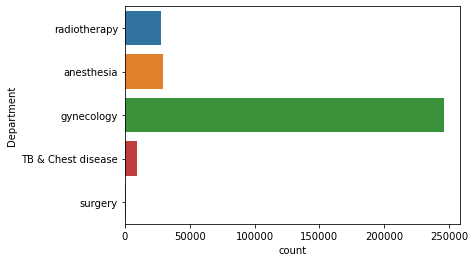

In [30]:
sns.countplot(data = los1[los1['dataset'] == 'train'], y = 'Department')

This mean, gynecology is the most visited department. Maybe each hospital should well prepared for gynecology department

In [240]:
los1.groupby(['Hospital_region_code', 'City_Code_Hospital'])[['Hospital_code']].count().rename(columns = {'Hospital_code':
                                                                                                         'Count'})

Count
Hospital_region_code City_Code_Hospital       
X                    1                   77357
                     4                   19381
                     6                   66156
                     11                  24267
Y                    2                   73353
                     7                   49825
                     9                   36941
                     10                   7380
                     13                   5172
Z                    3                   44950
                     5                   43876

#### Counting by Hospital type

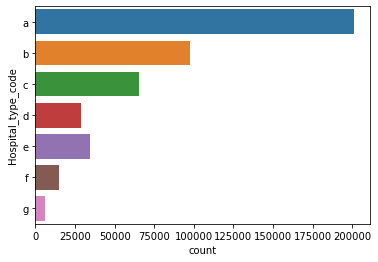

In [241]:
sns.countplot(data = los1.sort_values(by = 'Hospital_type_code'), y = 'Hospital_type_code')
plt.show()

In [35]:
pd.crosstab(los1['Type of Admission'], columns = los1['dataset'] )

dataset,test,train
Type of Admission,,
Emergency,49663,115564
Trauma,64476,150252
Urgent,20726,47977


In [36]:
pd.crosstab(los1['Severity of Illness'], columns = los1['dataset'] )

dataset,test,train
Severity of Illness,,
0,36116,84319
1,74585,173425
2,24164,56049


In [29]:
pd.crosstab(los1['Bed Grade'], columns = los1['dataset'] )

dataset,test,train
Bed Grade,,
1.0,10932,26212
2.0,52108,122297
3.0,47577,108878
4.0,24248,56406


In [30]:
pd.crosstab(los1['Department'], columns = los['dataset'])

dataset,test,train
Department,,
TB & Chest disease,4115,9460
anesthesia,12459,29187
gynecology,105496,245850
radiotherapy,12349,28153
surgery,446,1143


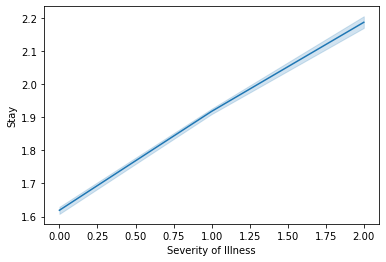

In [26]:
sns.lineplot(los1['Severity of Illness'], los1['Stay'])
plt.show()

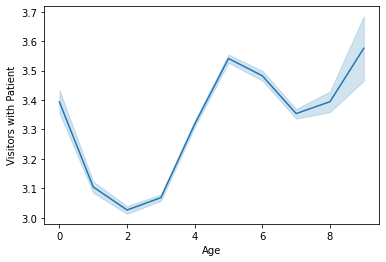

In [27]:
sns.lineplot(los1['Age'], los1['Visitors with Patient'])
plt.show()

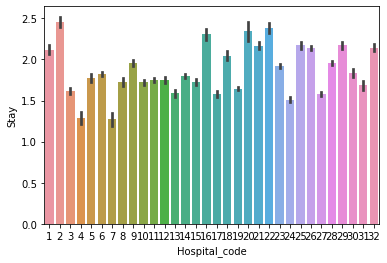

In [28]:
sns.barplot(y = los1['Stay'], x = los1['Hospital_code'])

#### Average number of visitors by LOS

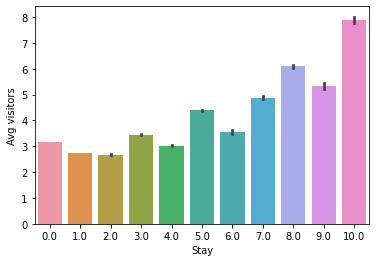

In [29]:
sns.barplot(x = los1['Stay'], y = los1['Visitors with Patient']).set_ylabel('Avg visitors')
plt.show()

#### Age vs Stay

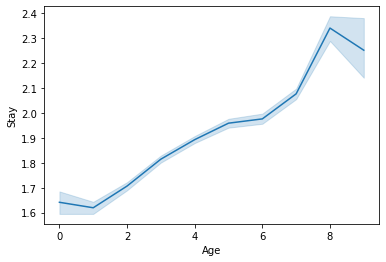

In [30]:
sns.lineplot(los1['Age'], los1['Stay'])
plt.show()

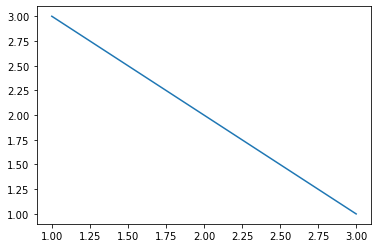

In [144]:
sns.lineplot([1, 2,3], [3,2,1])

In [31]:
tmp = los1[['Type of Admission', 'Severity of Illness', 'Age']]
tmp.groupby(['Type of Admission', 'Severity of Illness'])[['Age']].count().rename(columns = {'Age': '#patients'})

#patients
Type of Admission Severity of Illness           
Emergency         0                        49363
                  1                        87879
                  2                        27985
Trauma            0                        51659
                  1                       122248
                  2                        40821
Urgent            0                        19413
                  1                        37883
                  2                        11407

#### Department vs Stay

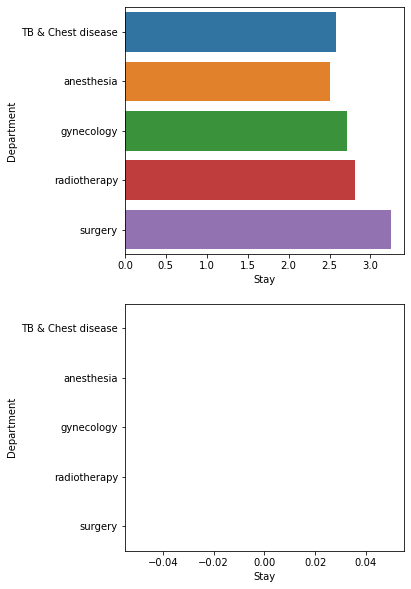

In [155]:
f, (ax1, ax2) = plt.subplots(2, figsize = (5, 10))

tmp = los1[los1['dataset'] == 'train'].groupby(['Department'])[['Stay']].mean().reset_index()
tmp1 = los1[los1['dataset'] == 'test'].groupby(['Department'])[['Stay']].mean().reset_index()
sns.barplot(tmp['Stay'], tmp['Department'], ax = ax1)
sns.barplot(tmp1['Stay'], tmp1['Department'], ax = ax2)

อ้าว เกิดอะไรขึ้นหละ .. เพราะว่าค่า stay ใน test มีแค่ class เดียว ตามด้านล่าง

#### Age and Admission deposit distribution in each dataset

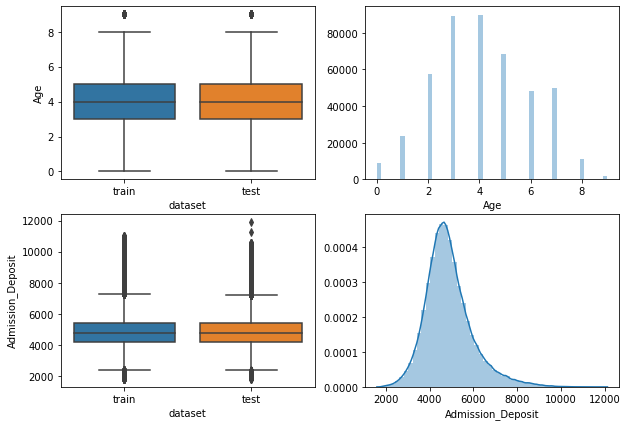

In [156]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,7)) 

sns.boxplot(los1['dataset'], los1['Age'], ax = ax1)
sns.distplot(los1['Age'], kde = False, ax = ax2)
sns.boxplot(los1['dataset'], los1['Admission_Deposit'],ax = ax3)
sns.distplot(los1['Admission_Deposit'], ax = ax4)
plt.show()

#### distribution of LOS for Train, Test and Overall

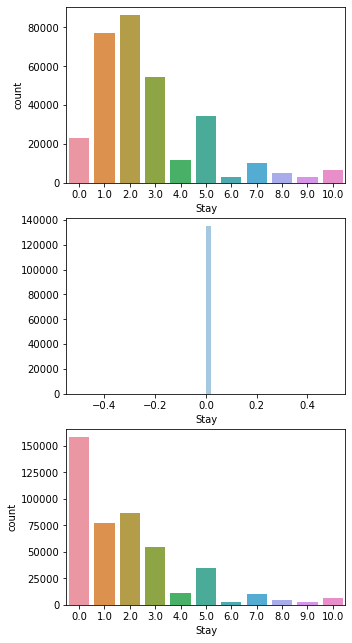

In [157]:
f, (ax1, ax2, ax3) = plt.subplots(3, figsize = (5,11))

# in this case it's same as distplot but more colours
sns.countplot(los1['Stay'][los1['dataset'] == 'train'], ax = ax1)
sns.distplot(los1['Stay'][los1['dataset'] == 'test'], kde = False, ax = ax2)
sns.countplot(los1['Stay'], ax = ax3)
plt.show()

มันแปลกตรงที่ว่าการกระจายตัวของตัวแปรอื่น ๆ ค่อนข้างใกล้เคียงกันใน train และ test <b>แต่ค่า y ของชุด test มีแค่ค่าเดียว</b>ซึ่งคาดว่าอาจเป็นความผิดพลาดของข้อมูลชุดนั้น จะตัดสินใจเลือกได้ 2 ทางที่คิดไว้ คือ <br>1. ใช้ train ชุดเดียวแล้วนำมา split เป็น train/test 
<br>2. คือใช้ train concat กับ test แล้วนำมา split อีกที
<br> ซึ่งตอนนี้เลือก option 1

In [33]:
# use only train maybe named as "df" (easy)
df = los1[los1['dataset'] == 'train'].drop('dataset', axis = 1)
df

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7,Emergency,2,2,5.0,4911.0,0.0
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7,Trauma,2,2,5.0,5954.0,4.0
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7,Trauma,2,2,5.0,4745.0,3.0
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7,Trauma,2,2,5.0,7272.0,4.0
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7,Trauma,2,2,5.0,5558.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23,Emergency,1,3,4.0,4144.0,1.0
318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8,Urgent,1,4,8.0,6699.0,3.0
318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10,Emergency,0,3,7.0,4235.0,1.0


In [34]:
pd.crosstab(los1['Department'], columns = 'N')

col_0,N
Department,
TB & Chest disease,13575
anesthesia,41646
gynecology,351346
radiotherapy,40502
surgery,1589


In [35]:
a = los1['Department'].value_counts()>=2000
a[a == True].index

Index(['gynecology', 'anesthesia', 'radiotherapy', 'TB & Chest disease'], dtype='object')

## Feature Engineering

In [36]:
pd.set_option('display.max_columns', 500)
lospp = df.copy()

tmp = lospp.select_dtypes(object)
dummie = pd.get_dummies(tmp.drop(columns = ['Hospital_region_code', 'Hospital_type_code']))

hcodedummy = pd.get_dummies(lospp[['Hospital_code', 'City_Code_Patient']].astype(str))

lospp = lospp.drop(columns = tmp.columns)
lospp = lospp.drop(columns = ['Hospital_code', 'City_Code_Hospital', 'City_Code_Patient', 'patientid'])

# drop one of each dummy columns
los_final = pd.concat([lospp, dummie, hcodedummy], axis = 1).drop(columns = [ 'Department_surgery', 'Ward_Type_P'\
                                                                             , 'Ward_Facility_Code_A', 'Type of Admission_Trauma'\
                                                                             , 'Hospital_code_1', 'City_Code_Patient_0'])
los_final

,Available Extra Rooms in Hospital,Bed Grade,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent,Hospital_code_10,Hospital_code_11,Hospital_code_12,Hospital_code_13,Hospital_code_14,Hospital_code_15,Hospital_code_16,Hospital_code_17,Hospital_code_18,Hospital_code_19,Hospital_code_2,Hospital_code_20,Hospital_code_21,Hospital_code_22,Hospital_code_23,Hospital_code_24,Hospital_code_25,Hospital_code_26,Hospital_code_27,Hospital_code_28,Hospital_code_29,Hospital_code_3,Hospital_code_30,Hospital_code_31,Hospital_code_32,Hospital_code_4,Hospital_code_5,Hospital_code_6,Hospital_code_7,Hospital_code_8,Hospital_code_9,City_Code_Patient_1,City_Code_Patient_10,City_Code_Patient_11,City_Code_Patient_12,City_Code_Patient_13,City_Code_Patient_14,City_Code_Patient_15,City_Code_Patient_16,City_Code_Patient_18,City_Code_Patient_19,City_Code_Patient_2,City_Code_Patient_20,City_Code_Patient_21,City_Code_Patient_22,City_Code_Patient_23,City_Code_Patient_24,City_Code_Patient_25,City_Code_Patient_26,City_Code_Patient_27,City_Code_Patient_28,City_Code_Patient_3,City_Code_Patient_4,City_Code_Patient_5,City_Code_Patient_6,City_Code_Patient_7,City_Code_Patient_8,City_Code_Patient_9
case_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,2.0,2,2,5.0,4911.0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,2.0,2,2,5.0,5954.0,4.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2,2.0,2,2,5.0,4745.0,3.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2,2.0,2,2,5.0,7272.0,4.0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,2,2.0,2,2,5.0,5558.0,4.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318434,3,4.0,1,3,4.0,4144.0,1.0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
318435,2,4.0,1,4,8.0,6699.0,3.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
318436,3,4.0,0,3,7.0,4235.0,1.0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
los_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313793 entries, 1 to 318438
Data columns (total 80 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Available Extra Rooms in Hospital  313793 non-null  int64  
 1   Bed Grade                          313793 non-null  float64
 2   Severity of Illness                313793 non-null  int64  
 3   Visitors with Patient              313793 non-null  int64  
 4   Age                                313793 non-null  float64
 5   Admission_Deposit                  313793 non-null  float64
 6   Stay                               313793 non-null  float64
 7   Department_TB & Chest disease      313793 non-null  uint8  
 8   Department_anesthesia              313793 non-null  uint8  
 9   Department_gynecology              313793 non-null  uint8  
 10  Department_radiotherapy            313793 non-null  uint8  
 11  Ward_Type_Q                        3137

## Feature Importances

In [250]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 150, min_samples_leaf = 20)
rfc.fit(los_final.drop('Stay', axis = 1), los_final['Stay'])

RandomForestClassifier(min_samples_leaf=20, n_estimators=150)

In [251]:
fim = pd.DataFrame(dict(Feature= los_final.drop('Stay', axis = 1).columns,
                  Value=rfc.feature_importances_))
fim.sort_values(by = 'Value')

,Feature,Value
67,City_Code_Patient_24,0.000001
71,City_Code_Patient_28,0.000005
65,City_Code_Patient_22,0.000008
68,City_Code_Patient_25,0.000009
54,City_Code_Patient_11,0.000011
...,...,...
10,Ward_Type_Q,0.043041
12,Ward_Type_S,0.046174
1,Bed Grade,0.064029
5,Admission_Deposit,0.090799


In [252]:
feature = []
value = []
for i in df.columns:
    icol = [f for f in fim['Feature'].values if i in f]
    if icol != []:
        feature.append(i)
        value.append(fim[fim['Feature'].isin(icol)].sum()[-1])

fim_trans = pd.DataFrame({'Features': feature, 'Values': value})
fim_trans.sort_values(by = 'Values', ascending = False)

,Features,Values
9,Visitors with Patient,0.399436
3,Ward_Type,0.112665
11,Admission_Deposit,0.090799
0,Hospital_code,0.085828
5,Bed Grade,0.064029
6,City_Code_Patient,0.048917
7,Type of Admission,0.042751
4,Ward_Facility_Code,0.039748
1,Available Extra Rooms in Hospital,0.036986
8,Severity of Illness,0.031467


# Catboost

In [39]:
rfc_train = los_final.sample(frac = 0.7, random_state = 42)
rfc_test = los_final.drop(index = rfc_train.index)

x_rfc_train = rfc_train.drop('Stay', axis = 1)
x_rfc_test = rfc_test.drop('Stay', axis = 1)
y_rfc_train = rfc_train['Stay']
y_rfc_test = rfc_test['Stay']

x_rfc_test

,Available Extra Rooms in Hospital,Bed Grade,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Department_TB & Chest disease,Department_anesthesia,Department_gynecology,Department_radiotherapy,Ward_Type_Q,Ward_Type_R,Ward_Type_S,Ward_Type_T,Ward_Facility_Code_B,Ward_Facility_Code_C,Ward_Facility_Code_D,Ward_Facility_Code_E,Ward_Facility_Code_F,Type of Admission_Emergency,Type of Admission_Urgent,Hospital_code_10,Hospital_code_11,Hospital_code_12,Hospital_code_13,Hospital_code_14,Hospital_code_15,Hospital_code_16,Hospital_code_17,Hospital_code_18,Hospital_code_19,Hospital_code_2,Hospital_code_20,Hospital_code_21,Hospital_code_22,Hospital_code_23,Hospital_code_24,Hospital_code_25,Hospital_code_26,Hospital_code_27,Hospital_code_28,Hospital_code_29,Hospital_code_3,Hospital_code_30,Hospital_code_31,Hospital_code_32,Hospital_code_4,Hospital_code_5,Hospital_code_6,Hospital_code_7,Hospital_code_8,Hospital_code_9,City_Code_Patient_1,City_Code_Patient_10,City_Code_Patient_11,City_Code_Patient_12,City_Code_Patient_13,City_Code_Patient_14,City_Code_Patient_15,City_Code_Patient_16,City_Code_Patient_18,City_Code_Patient_19,City_Code_Patient_2,City_Code_Patient_20,City_Code_Patient_21,City_Code_Patient_22,City_Code_Patient_23,City_Code_Patient_24,City_Code_Patient_25,City_Code_Patient_26,City_Code_Patient_27,City_Code_Patient_28,City_Code_Patient_3,City_Code_Patient_4,City_Code_Patient_5,City_Code_Patient_6,City_Code_Patient_7,City_Code_Patient_8,City_Code_Patient_9
case_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6,2,2.0,2,2,5.0,4449.0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8,4,3.0,2,2,5.0,5571.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,2,4.0,2,2,5.0,7223.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
14,3,3.0,2,2,5.0,8477.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
15,4,3.0,2,2,7.0,2685.0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318424,2,4.0,1,2,3.0,3190.0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
318428,2,3.0,0,4,5.0,4271.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
318429,2,4.0,0,2,1.0,4125.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
dftmp = df.drop(columns = ['Hospital_type_code'
                              , 'City_Code_Hospital'
                              , 'Hospital_region_code'
                              , 'patientid'])

In [43]:
df_train = dftmp.sample(frac = 0.7, random_state = 42)
df_test = dftmp.drop(index = df_train.index)

x_train = df_train.drop('Stay', axis = 1)
x_test = df_test.drop('Stay', axis = 1)
y_train = df_train['Stay']
y_test = df_test['Stay']

In [37]:
pd.crosstab(df_train['Stay'], columns = 'N').sort_values(by = 'N')

col_0,N
Stay,
6.0,1882
9.0,1885
8.0,3335
10.0,4567
7.0,7107
4.0,7996
0.0,16393
5.0,24201
3.0,37972


In [38]:
pd.crosstab(df_test['Stay'], columns = 'N').sort_values(by = 'N')

col_0,N
Stay,
6.0,816
9.0,828
8.0,1426
10.0,1981
7.0,2989
4.0,3545
0.0,6857
5.0,10262
3.0,16340


In [39]:
y_test

case_id
6         1.0
8         4.0
9         5.0
14        2.0
15        0.0
         ... 
318424    1.0
318428    3.0
318429    1.0
318432    1.0
318434    1.0
Name: Stay, Length: 94138, dtype: float64

In [44]:
x_train

,Hospital_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
case_id,,,,,,,,,,,,
107396,6,4,gynecology,Q,F,2.0,15,Trauma,2,2,4.0,7446.0
49367,10,3,gynecology,S,E,1.0,25,Trauma,1,2,2.0,5453.0
110756,11,4,gynecology,Q,D,2.0,8,Trauma,2,4,5.0,4189.0
9165,30,3,TB & Chest disease,R,A,3.0,11,Trauma,0,3,7.0,5464.0
174463,30,4,gynecology,Q,A,2.0,8,Trauma,1,2,2.0,4595.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45986,9,4,gynecology,R,F,4.0,9,Emergency,1,6,3.0,4790.0
105051,19,4,gynecology,Q,C,2.0,8,Emergency,1,4,5.0,4071.0
222860,6,4,gynecology,R,F,2.0,23,Emergency,1,3,3.0,3751.0


In [45]:
from catboost import Pool, CatBoostClassifier

In [46]:
cat_features = [0,2,3,4,6,7]

In [47]:
trainpool = Pool(data = x_train, label = y_train, cat_features = cat_features)
trainpool

In [48]:
testpool = Pool(data = x_test, cat_features = cat_features)
testpool

In [72]:
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.1,
                           depth=8,
                           loss_function='MultiClass',
                           eval_metric='Accuracy')

In [73]:
model.fit(trainpool)

0:	learn: 0.3596595	total: 4.71s	remaining: 7m 46s
1:	learn: 0.3646491	total: 12.3s	remaining: 10m 5s
2:	learn: 0.3651362	total: 20.1s	remaining: 10m 49s
3:	learn: 0.3669527	total: 27.9s	remaining: 11m 9s
4:	learn: 0.3721199	total: 34.6s	remaining: 10m 58s
5:	learn: 0.3780747	total: 42.2s	remaining: 11m
6:	learn: 0.3803146	total: 50s	remaining: 11m 4s
7:	learn: 0.3821857	total: 57.6s	remaining: 11m 1s
8:	learn: 0.3825818	total: 1m 3s	remaining: 10m 37s
9:	learn: 0.3839202	total: 1m 10s	remaining: 10m 36s
10:	learn: 0.3851403	total: 1m 18s	remaining: 10m 33s
11:	learn: 0.3876397	total: 1m 26s	remaining: 10m 32s
12:	learn: 0.3896520	total: 1m 33s	remaining: 10m 28s
13:	learn: 0.3922697	total: 1m 41s	remaining: 10m 24s
14:	learn: 0.3930527	total: 1m 49s	remaining: 10m 19s
15:	learn: 0.3971728	total: 1m 57s	remaining: 10m 15s
16:	learn: 0.3996039	total: 2m 5s	remaining: 10m 11s
17:	learn: 0.4008240	total: 2m 12s	remaining: 10m 5s
18:	learn: 0.4019166	total: 2m 20s	remaining: 9m 59s
19:	lea

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [108]:
res = model.predict(testpool)
print(classification_report(y_true=y_test.values, y_pred=res))

              precision    recall  f1-score   support

         0.0       0.43      0.12      0.19      6857
         1.0       0.42      0.51      0.46     23154
         2.0       0.42      0.65      0.51     25940
         3.0       0.42      0.24      0.30     16340
         4.0       0.33      0.00      0.00      3545
         5.0       0.40      0.49      0.44     10262
         6.0       0.00      0.00      0.00       816
         7.0       0.29      0.00      0.01      2989
         8.0       0.42      0.15      0.22      1426
         9.0       0.00      0.00      0.00       828
        10.0       0.52      0.42      0.46      1981

    accuracy                           0.42     94138
   macro avg       0.33      0.23      0.24     94138
weighted avg       0.40      0.42      0.38     94138



In [75]:
model1 = CatBoostClassifier(iterations=200,
                           learning_rate=0.1,
                           depth=8,
                           loss_function='MultiClass',
                           eval_metric='Accuracy')

In [76]:
model1.fit(trainpool)

0:	learn: 0.3816895	total: 21.1s	remaining: 1h 9m 58s
1:	learn: 0.3847579	total: 44.2s	remaining: 1h 12m 54s
2:	learn: 0.3837063	total: 1m 2s	remaining: 1h 8m 23s
3:	learn: 0.3887870	total: 1m 28s	remaining: 1h 12m 20s
4:	learn: 0.3902074	total: 1m 52s	remaining: 1h 13m 9s
5:	learn: 0.3908220	total: 2m 14s	remaining: 1h 12m 27s
6:	learn: 0.3923016	total: 2m 37s	remaining: 1h 12m 15s
7:	learn: 0.3927204	total: 2m 58s	remaining: 1h 11m 22s
8:	learn: 0.3943867	total: 3m 23s	remaining: 1h 11m 49s
9:	learn: 0.3952243	total: 3m 44s	remaining: 1h 11m 8s
10:	learn: 0.3952699	total: 4m 6s	remaining: 1h 10m 43s
11:	learn: 0.3968769	total: 4m 28s	remaining: 1h 9m 58s
12:	learn: 0.3979104	total: 4m 50s	remaining: 1h 9m 44s
13:	learn: 0.3992852	total: 5m 12s	remaining: 1h 9m 15s
14:	learn: 0.3993945	total: 5m 23s	remaining: 1h 6m 27s
15:	learn: 0.4011245	total: 5m 46s	remaining: 1h 6m 20s
16:	learn: 0.4032961	total: 6m 13s	remaining: 1h 6m 56s
17:	learn: 0.4052674	total: 6m 35s	remaining: 1h 6m 37s

150:	learn: 0.4386834	total: 38m 2s	remaining: 12m 20s
151:	learn: 0.4388746	total: 38m 16s	remaining: 12m 5s
152:	learn: 0.4391022	total: 38m 28s	remaining: 11m 49s
153:	learn: 0.4392661	total: 38m 44s	remaining: 11m 34s
154:	learn: 0.4395120	total: 38m 57s	remaining: 11m 18s
155:	learn: 0.4397897	total: 39m 8s	remaining: 11m 2s
156:	learn: 0.4400173	total: 39m 24s	remaining: 10m 47s
157:	learn: 0.4403223	total: 39m 34s	remaining: 10m 31s
158:	learn: 0.4405226	total: 39m 46s	remaining: 10m 15s
159:	learn: 0.4405317	total: 40m	remaining: 10m
160:	learn: 0.4406774	total: 40m 13s	remaining: 9m 44s
161:	learn: 0.4408186	total: 40m 29s	remaining: 9m 29s
162:	learn: 0.4409779	total: 40m 39s	remaining: 9m 13s
163:	learn: 0.4411463	total: 40m 52s	remaining: 8m 58s
164:	learn: 0.4413057	total: 41m 7s	remaining: 8m 43s
165:	learn: 0.4414468	total: 41m 23s	remaining: 8m 28s
166:	learn: 0.4415697	total: 41m 34s	remaining: 8m 12s
167:	learn: 0.4416699	total: 41m 48s	remaining: 7m 57s
168:	learn: 0

In [106]:
res1 = model1.predict(testpool)
print(classification_report(y_true=y_test.values, y_pred=res1))

              precision    recall  f1-score   support

         0.0       0.41      0.15      0.22      6857
         1.0       0.43      0.50      0.46     23154
         2.0       0.43      0.67      0.52     25940
         3.0       0.43      0.23      0.30     16340
         4.0       0.13      0.00      0.00      3545
         5.0       0.41      0.50      0.45     10262
         6.0       0.00      0.00      0.00       816
         7.0       0.38      0.02      0.03      2989
         8.0       0.37      0.20      0.26      1426
         9.0       0.00      0.00      0.00       828
        10.0       0.53      0.42      0.47      1981

    accuracy                           0.42     94138
   macro avg       0.32      0.24      0.25     94138
weighted avg       0.41      0.42      0.39     94138



In [88]:
model2 = CatBoostClassifier(iterations=150,
                           learning_rate=0.08,
                           depth=6,
                           l2_leaf_reg = 20,
                           loss_function='MultiClass',
                           eval_metric='Accuracy')

In [89]:
model2.fit(trainpool)

0:	learn: 0.3596595	total: 1.54s	remaining: 3m 49s
1:	learn: 0.3639207	total: 3.29s	remaining: 4m 3s
2:	learn: 0.3641165	total: 5.11s	remaining: 4m 10s
3:	learn: 0.3647128	total: 6.84s	remaining: 4m 9s
4:	learn: 0.3670756	total: 8.69s	remaining: 4m 11s
5:	learn: 0.3681774	total: 10.5s	remaining: 4m 12s
6:	learn: 0.3728665	total: 12.6s	remaining: 4m 17s
7:	learn: 0.3752157	total: 14.5s	remaining: 4m 17s
8:	learn: 0.3766816	total: 16.5s	remaining: 4m 18s
9:	learn: 0.3782022	total: 18.4s	remaining: 4m 16s
10:	learn: 0.3797227	total: 20.4s	remaining: 4m 17s
11:	learn: 0.3805331	total: 22.4s	remaining: 4m 18s
12:	learn: 0.3812661	total: 24.4s	remaining: 4m 17s
13:	learn: 0.3820764	total: 26.4s	remaining: 4m 16s
14:	learn: 0.3827320	total: 28.4s	remaining: 4m 16s
15:	learn: 0.3824315	total: 30.4s	remaining: 4m 14s
16:	learn: 0.3828959	total: 32.4s	remaining: 4m 13s
17:	learn: 0.3842571	total: 34.6s	remaining: 4m 13s
18:	learn: 0.3865972	total: 36.8s	remaining: 4m 13s
19:	learn: 0.3884319	tot

In [107]:
res2 = model2.predict(testpool)
print(classification_report(y_true=y_test.values, y_pred=res2))

              precision    recall  f1-score   support

         0.0       0.43      0.11      0.18      6857
         1.0       0.42      0.50      0.45     23154
         2.0       0.42      0.66      0.51     25940
         3.0       0.41      0.22      0.29     16340
         4.0       0.00      0.00      0.00      3545
         5.0       0.39      0.49      0.44     10262
         6.0       0.00      0.00      0.00       816
         7.0       0.43      0.00      0.00      2989
         8.0       0.39      0.15      0.22      1426
         9.0       0.00      0.00      0.00       828
        10.0       0.51      0.42      0.46      1981

    accuracy                           0.42     94138
   macro avg       0.31      0.23      0.23     94138
weighted avg       0.39      0.42      0.38     94138



In [129]:
model3 = CatBoostClassifier(iterations=500,
                           learning_rate=0.05,
                           depth=10,
                           loss_function='MultiClass',
                           eval_metric='Accuracy')

In [130]:
model3.fit(trainpool)

0:	learn: 0.3858596	total: 26.1s	remaining: 3h 36m 40s
1:	learn: 0.3949694	total: 50.9s	remaining: 3h 31m 16s
2:	learn: 0.3953245	total: 1m 20s	remaining: 3h 42m 37s
3:	learn: 0.3945232	total: 1m 50s	remaining: 3h 48m 22s
4:	learn: 0.3980060	total: 2m 19s	remaining: 3h 50m 34s
5:	learn: 0.3989620	total: 2m 49s	remaining: 3h 52m 10s
6:	learn: 0.3993854	total: 3m 18s	remaining: 3h 52m 28s
7:	learn: 0.3979468	total: 3m 31s	remaining: 3h 36m 22s
8:	learn: 0.3991213	total: 4m 1s	remaining: 3h 39m 29s
9:	learn: 0.3992716	total: 4m 30s	remaining: 3h 40m 30s
10:	learn: 0.3997860	total: 5m	remaining: 3h 42m 50s
11:	learn: 0.3996085	total: 5m 31s	remaining: 3h 44m 44s
12:	learn: 0.4000319	total: 6m 1s	remaining: 3h 45m 48s
13:	learn: 0.4007967	total: 6m 31s	remaining: 3h 46m 14s
14:	learn: 0.4014796	total: 6m 58s	remaining: 3h 45m 43s
15:	learn: 0.4018210	total: 7m 26s	remaining: 3h 45m 12s
16:	learn: 0.4023856	total: 7m 54s	remaining: 3h 44m 55s
17:	learn: 0.4032506	total: 8m 23s	remaining: 3h 

142:	learn: 0.4388336	total: 1h 10m 3s	remaining: 2h 54m 52s
143:	learn: 0.4387927	total: 1h 10m 35s	remaining: 2h 54m 31s
144:	learn: 0.4390931	total: 1h 11m 4s	remaining: 2h 54m 1s
145:	learn: 0.4391705	total: 1h 11m 39s	remaining: 2h 53m 43s
146:	learn: 0.4392570	total: 1h 12m 10s	remaining: 2h 53m 18s
147:	learn: 0.4394664	total: 1h 12m 44s	remaining: 2h 53m
148:	learn: 0.4395256	total: 1h 13m 14s	remaining: 2h 52m 31s
149:	learn: 0.4398853	total: 1h 13m 46s	remaining: 2h 52m 7s
150:	learn: 0.4399217	total: 1h 14m 9s	remaining: 2h 51m 23s
151:	learn: 0.4400765	total: 1h 14m 41s	remaining: 2h 51m 1s
152:	learn: 0.4402358	total: 1h 15m 15s	remaining: 2h 50m 41s
153:	learn: 0.4403861	total: 1h 15m 49s	remaining: 2h 50m 22s
154:	learn: 0.4403861	total: 1h 15m 50s	remaining: 2h 48m 48s
155:	learn: 0.4404589	total: 1h 16m 17s	remaining: 2h 48m 14s
156:	learn: 0.4405909	total: 1h 16m 44s	remaining: 2h 47m 39s
157:	learn: 0.4406182	total: 1h 17m 17s	remaining: 2h 47m 17s
158:	learn: 0.4406

277:	learn: 0.4556236	total: 2h 27m 1s	remaining: 1h 57m 24s
278:	learn: 0.4558011	total: 2h 27m 27s	remaining: 1h 56m 48s
279:	learn: 0.4560333	total: 2h 27m 53s	remaining: 1h 56m 11s
280:	learn: 0.4560424	total: 2h 28m 15s	remaining: 1h 55m 32s
281:	learn: 0.4563839	total: 2h 28m 37s	remaining: 1h 54m 53s
282:	learn: 0.4566616	total: 2h 28m 58s	remaining: 1h 54m 14s
283:	learn: 0.4568164	total: 2h 29m 22s	remaining: 1h 53m 36s
284:	learn: 0.4568847	total: 2h 29m 48s	remaining: 1h 53m 1s
285:	learn: 0.4570394	total: 2h 30m 16s	remaining: 1h 52m 26s
286:	learn: 0.4571123	total: 2h 30m 41s	remaining: 1h 51m 50s
287:	learn: 0.4572944	total: 2h 31m 5s	remaining: 1h 51m 12s
288:	learn: 0.4575402	total: 2h 31m 34s	remaining: 1h 50m 39s
289:	learn: 0.4576222	total: 2h 31m 58s	remaining: 1h 50m 3s
290:	learn: 0.4578225	total: 2h 32m 26s	remaining: 1h 49m 29s
291:	learn: 0.4580410	total: 2h 32m 56s	remaining: 1h 48m 56s
292:	learn: 0.4584553	total: 2h 33m 20s	remaining: 1h 48m 19s
293:	learn: 

413:	learn: 0.4743029	total: 3h 34m 4s	remaining: 44m 28s
414:	learn: 0.4745169	total: 3h 34m 26s	remaining: 43m 55s
415:	learn: 0.4746307	total: 3h 34m 50s	remaining: 43m 22s
416:	learn: 0.4747399	total: 3h 35m 7s	remaining: 42m 49s
417:	learn: 0.4748583	total: 3h 35m 33s	remaining: 42m 17s
418:	learn: 0.4750222	total: 3h 35m 51s	remaining: 41m 43s
419:	learn: 0.4750541	total: 3h 36m 12s	remaining: 41m 10s
420:	learn: 0.4752544	total: 3h 36m 33s	remaining: 40m 38s
421:	learn: 0.4752589	total: 3h 36m 50s	remaining: 40m 4s
422:	learn: 0.4753318	total: 3h 37m 9s	remaining: 39m 31s
423:	learn: 0.4755594	total: 3h 37m 34s	remaining: 38m 59s
424:	learn: 0.4756732	total: 3h 37m 55s	remaining: 38m 27s
425:	learn: 0.4758371	total: 3h 38m 18s	remaining: 37m 55s
426:	learn: 0.4758280	total: 3h 38m 41s	remaining: 37m 23s
427:	learn: 0.4759282	total: 3h 39m 4s	remaining: 36m 51s
428:	learn: 0.4761558	total: 3h 39m 24s	remaining: 36m 18s
429:	learn: 0.4763698	total: 3h 39m 48s	remaining: 35m 46s
43

In [131]:
res3 = model3.predict(testpool)
print(classification_report(y_true=y_test.values, y_pred=res3))

C:\Users\Save\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.40      0.16      0.23      6857
         1.0       0.43      0.49      0.46     23154
         2.0       0.43      0.67      0.52     25940
         3.0       0.43      0.23      0.30     16340
         4.0       0.17      0.00      0.00      3545
         5.0       0.41      0.50      0.45     10262
         6.0       0.00      0.00      0.00       816
         7.0       0.33      0.03      0.05      2989
         8.0       0.38      0.21      0.27      1426
         9.0       0.33      0.00      0.01       828
        10.0       0.54      0.42      0.47      1981

    accuracy                           0.42     94138
   macro avg       0.35      0.25      0.25     94138
weighted avg       0.41      0.42      0.39     94138



## GridSearchCV

In [119]:
param_grid = [{'min_samples_leaf':[1,20],
               'max_leaf_nodes':[250,None],
               'min_samples_split':[2,60,100],
               'max_depth':[20, None]}]

In [120]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = RandomForestClassifier(n_estimators = 150),
                     param_grid = param_grid, cv = 3,
                     n_jobs = -1, verbose = True,
                     return_train_score = True,
                     scoring='accuracy')
grid_search.fit(x_rfc_train, y_rfc_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 20.1min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=150),
             n_jobs=-1,
             param_grid=[{'max_depth': [20, None],
                          'max_leaf_nodes': [250, None],
                          'min_samples_leaf': [1, 20],
                          'min_samples_split': [2, 60, 100]}],
             return_train_score=True, scoring='accuracy', verbose=True)

In [121]:
pd.DataFrame(grid_search.cv_results_)\
  .sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
19,123.158565,0.964147,10.377491,0.869346,None,None,1,60,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.423497,0.422260,0.418709,0.421488,0.002029,1,0.512401,0.509031,0.510868,0.510767,0.001378
20,111.894949,4.768349,9.807187,0.465461,None,None,1,100,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.423019,0.421372,0.419596,0.421329,0.001397,2,0.480893,0.482378,0.481900,0.481724,0.000619
7,111.812054,0.465517,10.216296,0.211918,20,None,1,60,"{'max_depth': 20, 'max_leaf_nodes': None, 'min...",0.422486,0.420429,0.418326,0.420414,0.001698,3,0.478291,0.480241,0.478998,0.479176,0.000806
8,111.205740,1.612167,9.635330,0.350720,20,None,1,100,"{'max_depth': 20, 'max_leaf_nodes': None, 'min...",0.421557,0.418900,0.418695,0.419717,0.001304,4,0.462926,0.464411,0.462807,0.463381,0.000730
6,135.773019,0.643269,12.534028,0.108500,20,None,1,2,"{'max_depth': 20, 'max_leaf_nodes': None, 'min...",0.421161,0.419323,0.417274,0.419253,0.001588,5,0.714305,0.710626,0.710941,0.711957,0.001665
21,90.753217,0.182752,9.955844,0.348822,None,None,20,2,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.417146,0.416373,0.414229,0.415916,0.001234,6,0.448148,0.449907,0.448766,0.448940,0.000728
22,92.986817,2.990294,8.829628,0.429328,None,None,20,60,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.416927,0.414502,0.413560,0.414996,0.001419,7,0.445184,0.446779,0.446875,0.446279,0.000775
23,89.621435,0.507124,8.341751,0.014270,None,None,20,100,"{'max_depth': None, 'max_leaf_nodes': None, 'm...",0.415603,0.415021,0.413860,0.414828,0.000724,8,0.440882,0.442566,0.442272,0.441907,0.000734
11,97.143619,1.141011,8.401762,0.156476,20,None,20,100,"{'max_depth': 20, 'max_leaf_nodes': None, 'min...",0.416203,0.414502,0.412453,0.414386,0.001533,9,0.438526,0.439008,0.439267,0.438934,0.000307
10,101.146503,1.470531,8.594502,0.062773,20,None,20,60,"{'max_depth': 20, 'max_leaf_nodes': None, 'min...",0.415848,0.413956,0.413218,0.414341,0.001108,10,0.441182,0.443426,0.443413,0.442674,0.001054


In [134]:
grid_search.best_estimator_

RandomForestClassifier(min_samples_split=60, n_estimators=150)

In [123]:
res3 = grid_search.predict(x_rfc_test)
print(classification_report(y_true=y_rfc_test.values, y_pred=res3))

C:\Users\Save\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.45      0.11      0.18      6857
         1.0       0.42      0.50      0.46     23154
         2.0       0.42      0.67      0.52     25940
         3.0       0.44      0.23      0.30     16340
         4.0       0.00      0.00      0.00      3545
         5.0       0.39      0.53      0.45     10262
         6.0       0.00      0.00      0.00       816
         7.0       0.29      0.00      0.00      2989
         8.0       0.52      0.02      0.05      1426
         9.0       0.00      0.00      0.00       828
        10.0       0.56      0.38      0.45      1981

    accuracy                           0.42     94138
   macro avg       0.32      0.22      0.22     94138
weighted avg       0.40      0.42      0.38     94138



In [124]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

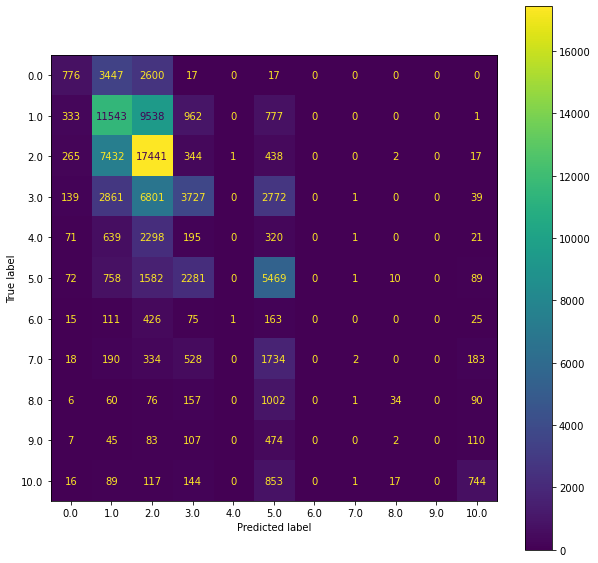

In [125]:
fig, ax = plt.subplots(figsize = (10,10))
plot_confusion_matrix(grid_search, x_rfc_test, y_rfc_test, ax = ax)

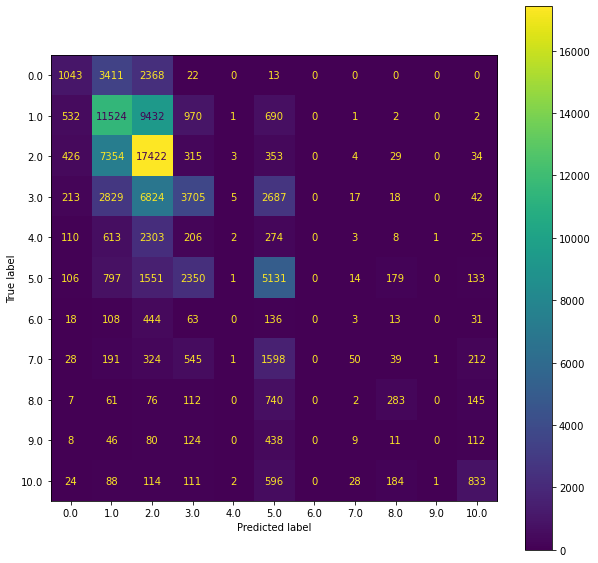

In [127]:
fig, ax = plt.subplots(figsize = (10,10))
plot_confusion_matrix(model1, x_test, y_test, ax = ax)

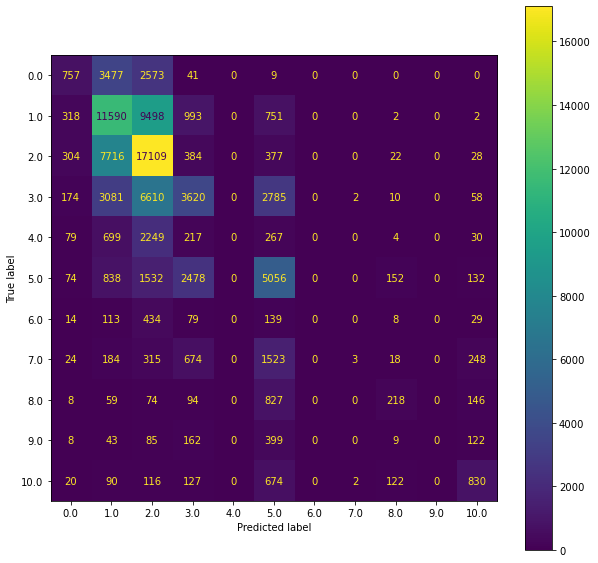

In [128]:
fig, ax = plt.subplots(figsize = (10,10))
plot_confusion_matrix(model2, x_test, y_test, ax = ax)

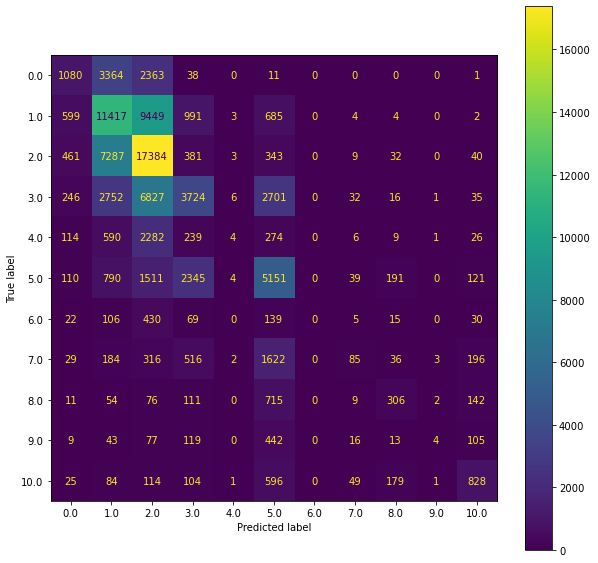

In [133]:
fig, ax = plt.subplots(figsize = (10,10))
plot_confusion_matrix(model3, x_test, y_test, ax = ax)

In [ ]:
RandomForestClassifier(min_samples_split=60, n_estimators=150)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError

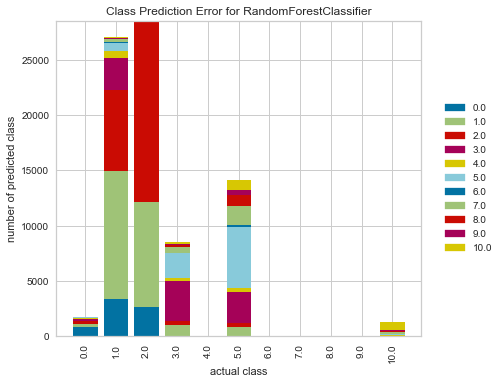

In [45]:
visualizer = ClassPredictionError(RandomForestClassifier(min_samples_split=60, n_estimators=150))
visualizer.fit(x_rfc_train, y_rfc_train)
visualizer.score(x_rfc_test, y_rfc_test)
visualizer.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## reg--------------------------------------------------------------------------------------------------------------------------

In [50]:
import statsmodels.api as sm
from statsmodels.genmod.families import Poisson

x_train = los_final.drop('Stay', axis =1)
y_train = los_final['Stay']

x_test = los_final.drop('Stay', axis =1)
y_test = los_final['Stay']

mod = sm.GLM(y_train, x_train, family = Poisson()).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   Stay   No. Observations:               448658
Model:                            GLM   Df Residuals:                   448573
Model Family:                 Poisson   Df Model:                           84
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.8153e+05
Date:                Fri, 13 Nov 2020   Deviance:                   9.5786e+05
Time:                        11:24:00   Pearson chi2:                 8.52e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Available Extra Rooms in Hospital    -0.0397      0.001    -35.796      0.000      -0.042      -0.038
Bed Grade                            -0.0388      0.001    -29.446      0.000      -0.041      -0.036
Severity of Illness                  -0.0155      0.001    -11.129      0.000      -0.018      -0.013
Visitors with Patient                 0.1355      0.000    399.542      0.000       0.135       0.136
Age                                   0.0203      0.001     34.444      0.000       0.019       0.021
Admission_Deposit                 -9.653e-06      1e-06     -9.612      0.000   -1.16e-05   -7.68e-06
Hospital_type_code_b                  0.0870      0.004     23.384      0.000       0.080       0.094
Hospital_type_code_c                  0.1900      0.016     11.591      0.000       0.158       0.222
Hospital_type_code_d                  0.0892      0.007     13.502      0.000       0.076       0.102
Hospital_type_code_e                  0.0072      0.004      1.868      0.062      -0.000       0.015
Hospital_type_code_f                 -0.0003      0.004     -0.068      0.946      -0.008       0.007
Hospital_type_code_g                  0.0799      0.005     17.102      0.000       0.071       0.089
Hospital_region_code_X                0.0736      0.012      6.269      0.000       0.051       0.097
Hospital_region_code_Y                0.0846      0.014      6.095      0.000       0.057       0.112
Department_TB & Chest disease        -0.2816      0.018    -15.903      0.000      -0.316      -0.247
Department_anesthesia                -0.3463      0.017    -20.421      0.000      -0.380      -0.313
Department_gynecology                -0.1833      0.017    -11.085      0.000      -0.216      -0.151
Department_radiotherapy              -0.2231      0.017    -13.230      0.000      -0.256      -0.190
Ward_Type_Q                           0.1671      0.010     16.021      0.000       0.147       0.188
Ward_Type_R                           0.3537      0.011     33.568      0.000       0.333       0.374
Ward_Type_S                           0.5527      0.011     51.516      0.000       0.532       0.574
Ward_Type_T                           0.4404      0.019     22.986      0.000       0.403       0.478
Ward_Type_U                           0.0751      0.259      0.290      0.772      -0.432       0.582
Ward_Facility_Code_B                  0.0643      0.005     12.628      0.000       0.054       0.074
Ward_Facility_Code_C                 -0.0522      0.006     -8.996      0.000      -0.064      -0.041
Ward_Facility_Code_D                  0.0725      0.005     14.132      0.000       0.062       0.083
Ward_Facility_Code_E                  0.0759      0.009      8.154      0.000       0.058       0.094
Ward_Facility_Code_F   

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
mean_absolute_error(y_pred=mod.predict(x_train), y_true=y_train)

1.5327795723673354

In [53]:
poissonpred = mod.get_prediction(x_train)

In [54]:
pred = poissonpred.summary_frame()
pred

,mean,mean_se,mean_ci_lower,mean_ci_upper
case_id,,,,
1,1.487770,0.018098,1.452717,1.523668
2,2.399557,0.022819,2.355247,2.444701
3,1.835036,0.016473,1.803032,1.867607
4,1.964519,0.013857,1.937547,1.991867
5,2.437225,0.016700,2.404713,2.470176
...,...,...,...,...
455491,1.547787,0.017021,1.514783,1.581511
455492,1.365060,0.012479,1.340819,1.389739
455493,1.197751,0.016019,1.166763,1.229562


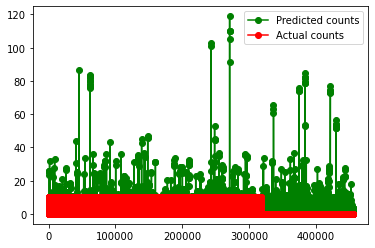

In [55]:
preds=pred['mean']

fig = plt.figure()
predicted, = plt.plot(x_train.index, preds, 'go-', label='Predicted counts')
actual, = plt.plot(x_train.index, y_train, 'ro-', label='Actual counts')
plt.legend(handles=[predicted, actual])
plt.show()            

In [56]:
preds = pred[['mean']]
preds.sort_values(by = 'mean', ascending = False)

,mean
case_id,
270984,118.933563
270980,110.126688
270983,110.061862
270981,109.953548
270982,105.128300
...,...
300402,0.337679
271190,0.332836
276898,0.319994


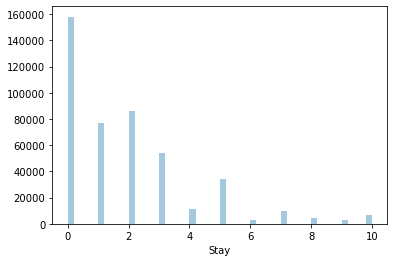

In [57]:
sns.distplot(y_train, kde = False)

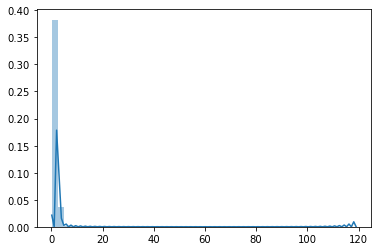

In [58]:
sns.distplot(preds)

In [59]:
preds[preds['mean'] < 10]

,mean
case_id,
1,1.487770
2,2.399557
3,1.835036
4,1.964519
5,2.437225
...,...
455491,1.547787
455492,1.365060
455493,1.197751


In [60]:
y_train

case_id
1         0.0
2         4.0
3         3.0
4         4.0
5         4.0
         ... 
455491    0.0
455492    0.0
455493    0.0
455494    0.0
455495    0.0
Name: Stay, Length: 448658, dtype: float64